## Logistic Regression
Trying my hands on logistic regression using red wine quality dataset.
Process Followed - 
* Descriptive analytics of dataset.
* visualizing featurs in dataset.
* checking for null values.
* running simple linear regression to check significant variabes in dataset
* running logistic regression to predict wine quality variable.
    - multinomial regression
    - binomial regression

In [136]:
# loading required libraries
library(readr)
library(dplyr)
library(ggplot2)
library(nnet)
library(caret)
library(MASS)
library(corrplot)

In [137]:
# loading wine quality dataset
winequality <- read.csv("C:/Users/Ajinkya/Dropbox/Machine Learning/Logistic Regression/winequality-red.csv")

### Exploratory analysis and visualizing features

In [138]:
head(winequality)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [139]:
str(winequality)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


In [140]:
summary(winequality)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [147]:
# checking for null values in data
cl <- c()
for (i in 1:ncol(winequality)){
  c <- sum(is.na(winequality[i]))
  if (c>0)
    cl <- c(cl, i)
}
print(cl)

NULL


No null values in dataset

In [141]:
table(winequality$quality)


  3   4   5   6   7   8 
 10  53 681 638 199  18 

This dataset is highly unbalanced. Most of the observations are for '5' and '6' quality wines 

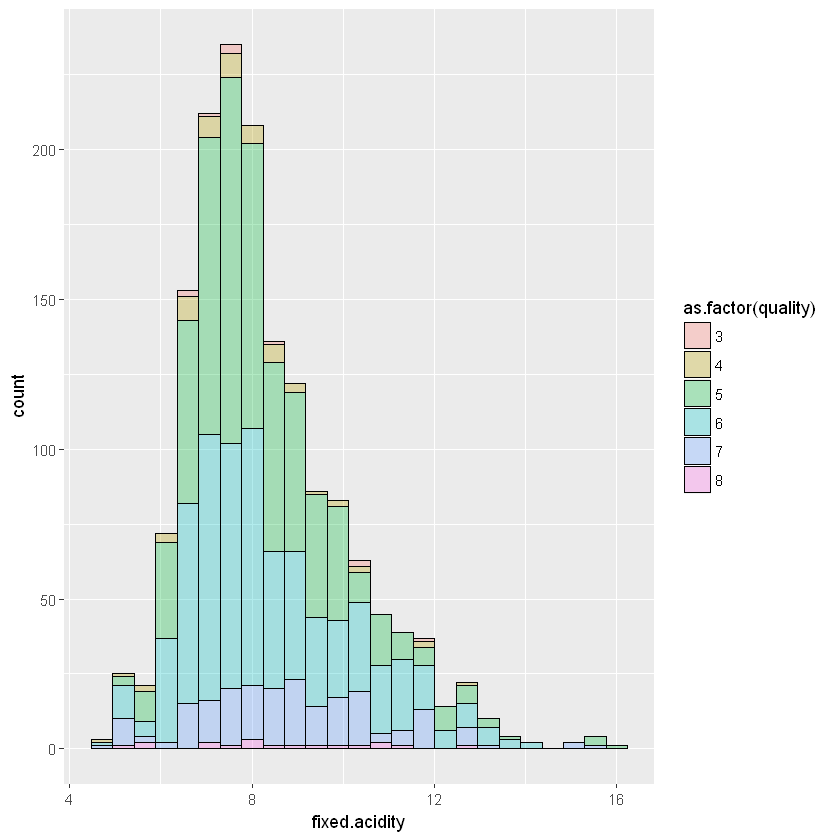

In [142]:
ggplot(winequality, aes(x=fixed.acidity,fill=as.factor(quality)))+
  geom_histogram(bins=25,col='black',alpha=0.3)

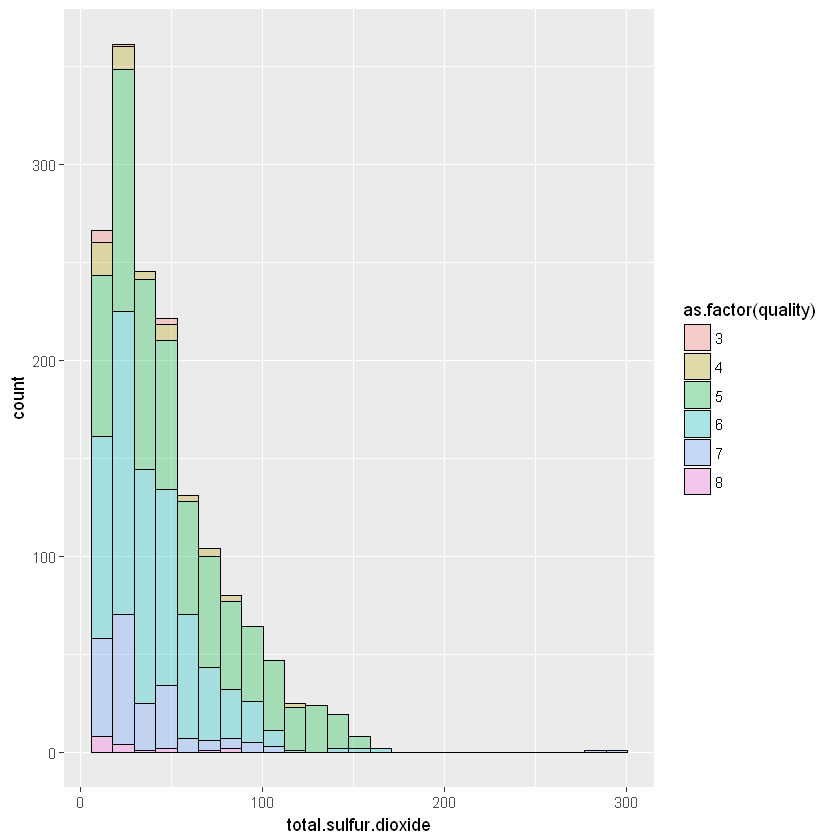

In [143]:
ggplot(winequality, aes(x=total.sulfur.dioxide,fill=as.factor(quality)))+
  geom_histogram(bins=25, col='black',alpha=0.3)

Both graph reiterates imbalance in dataset. There are few high values avaliable in dataset which we will examine through boxplot

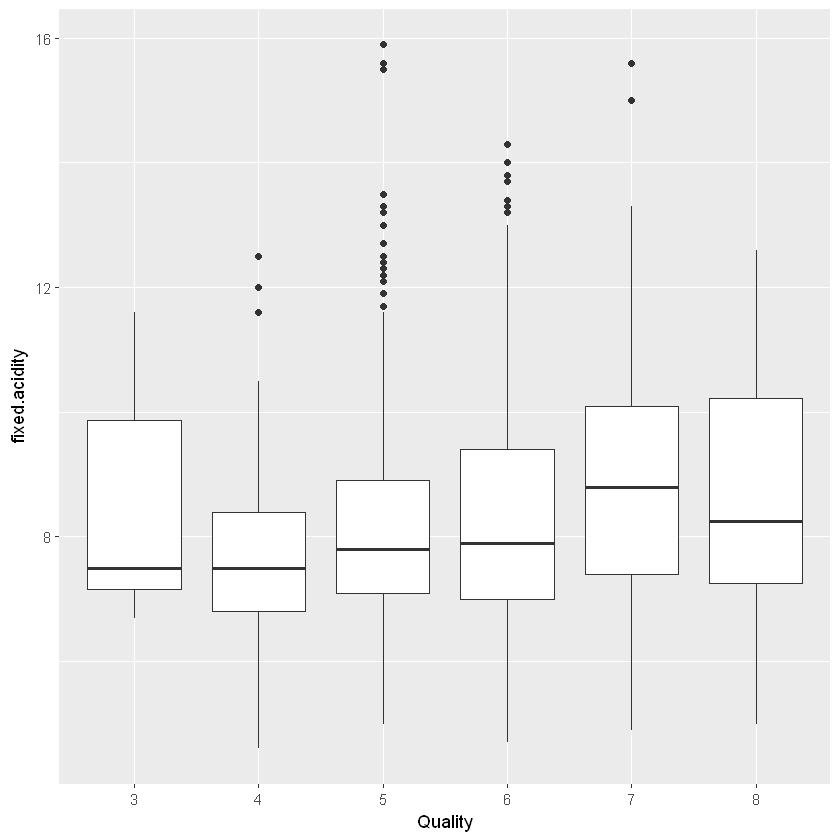

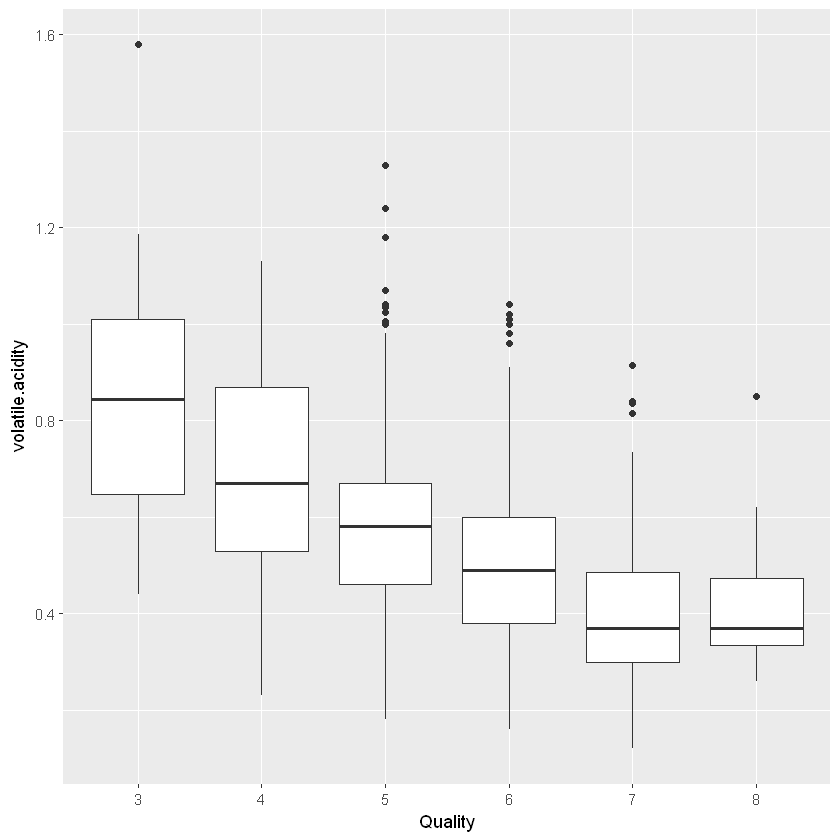

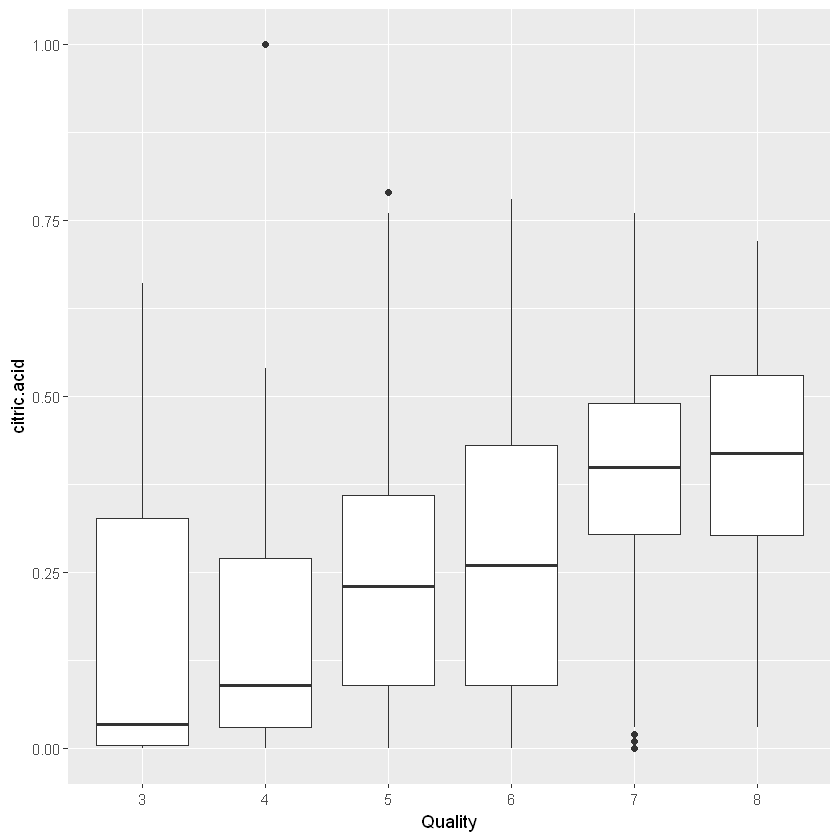

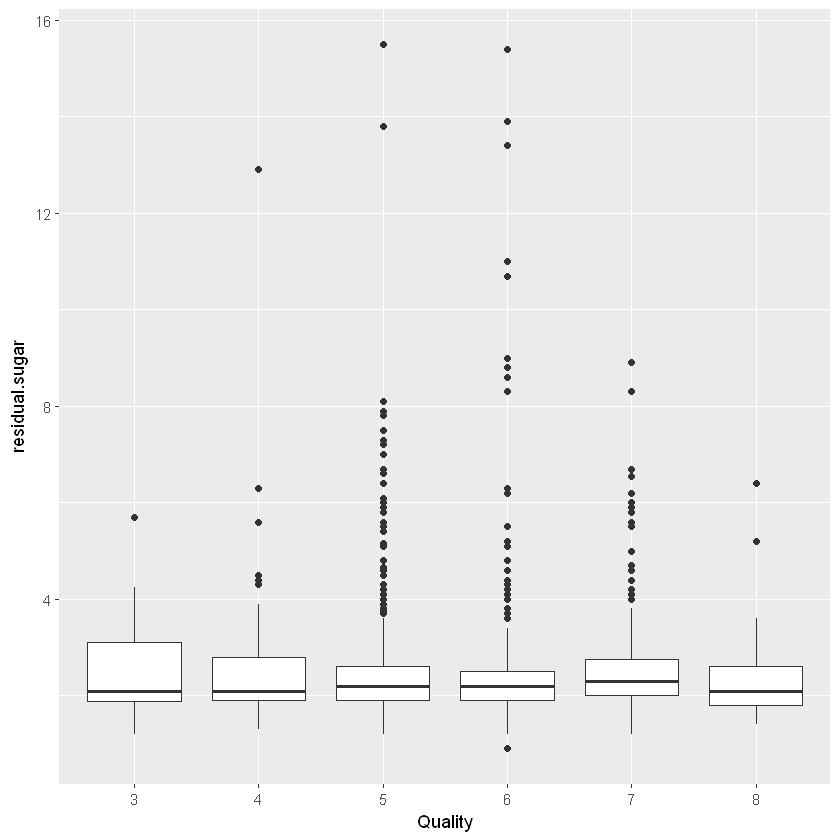

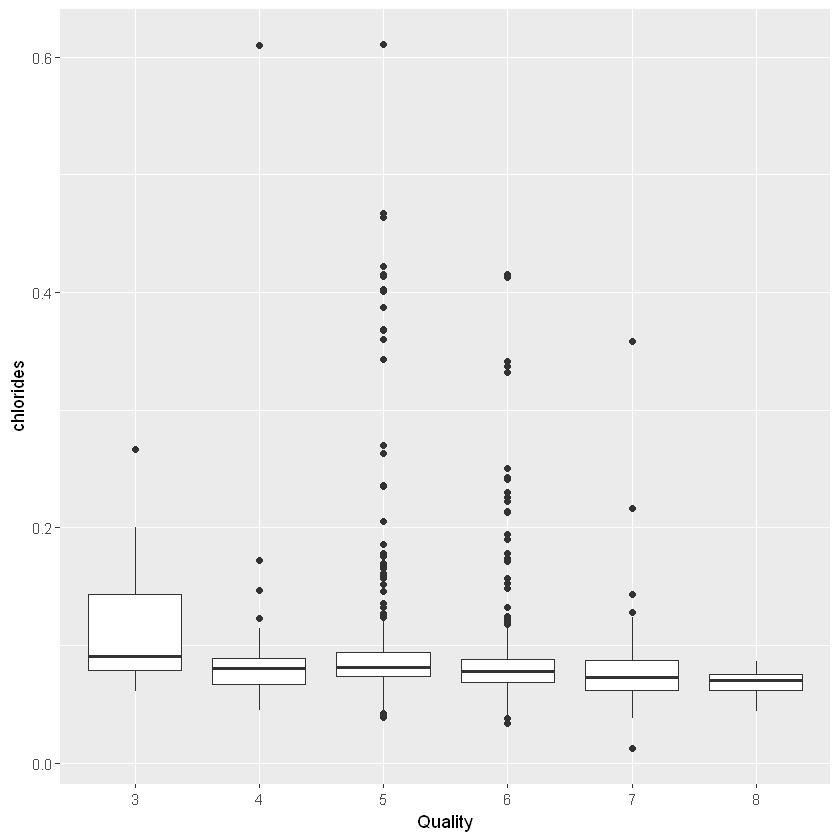

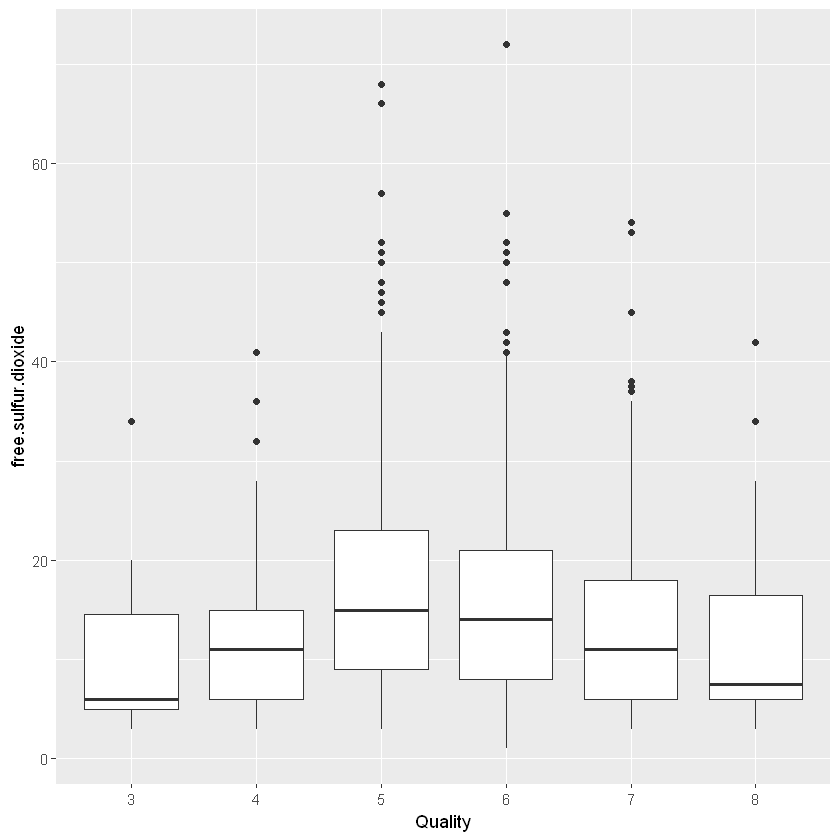

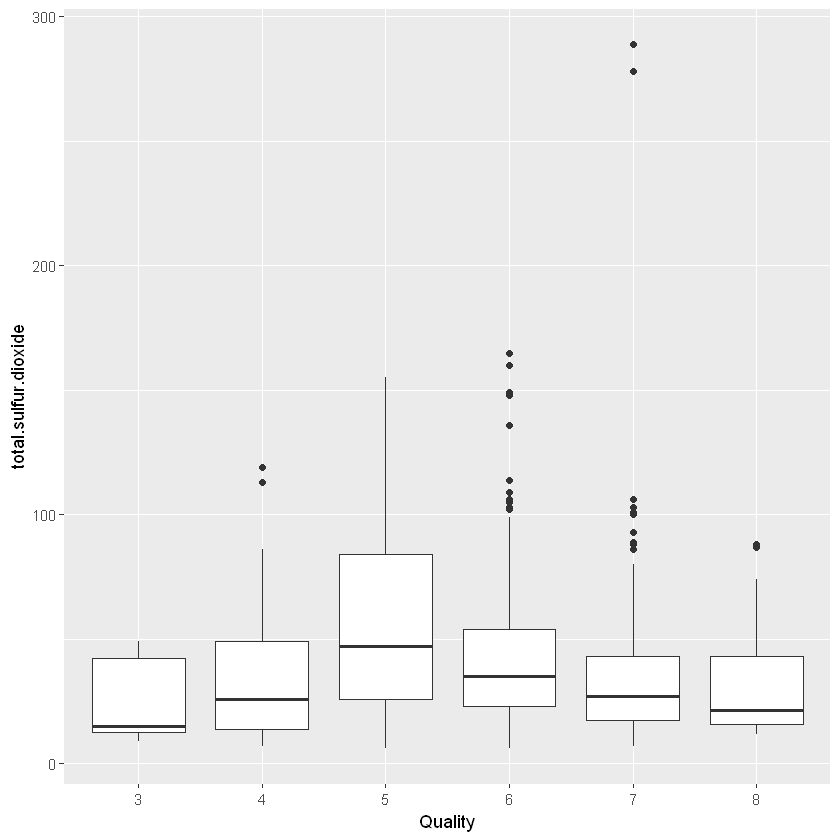

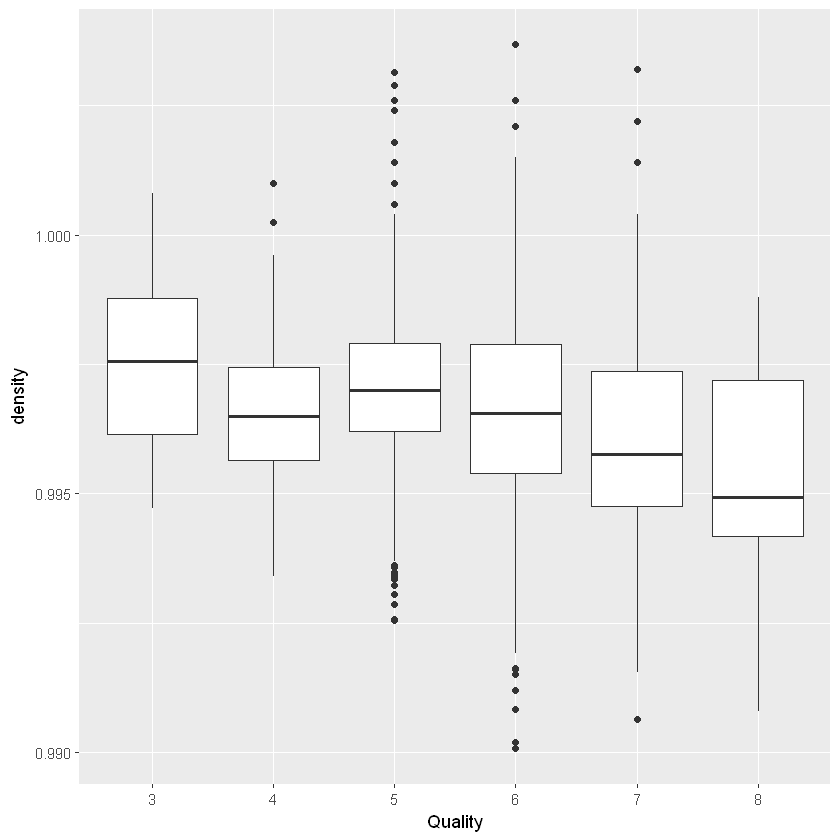

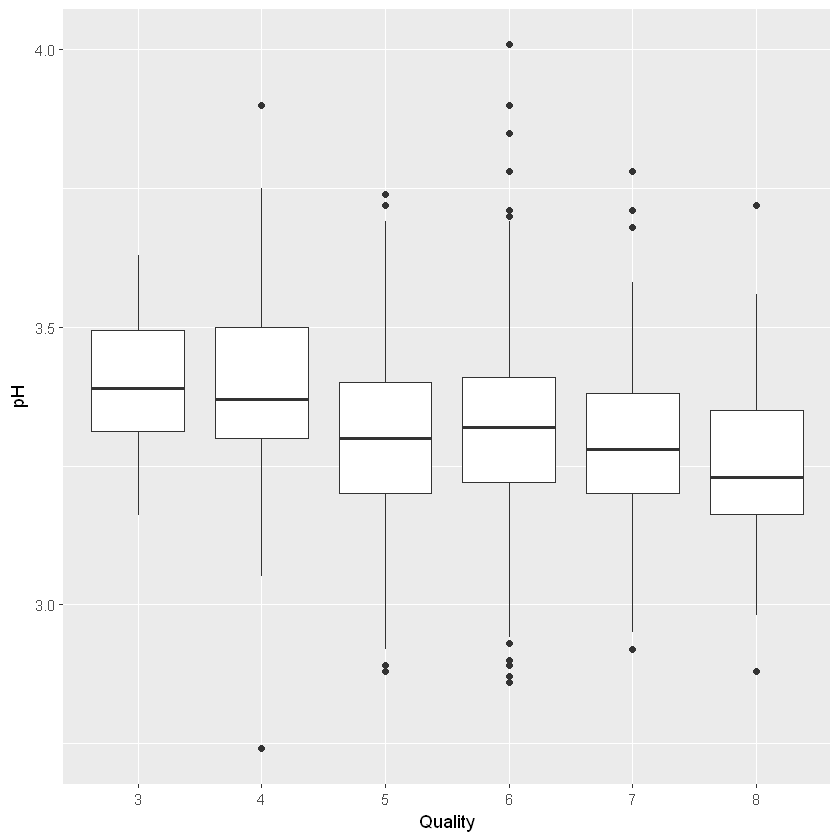

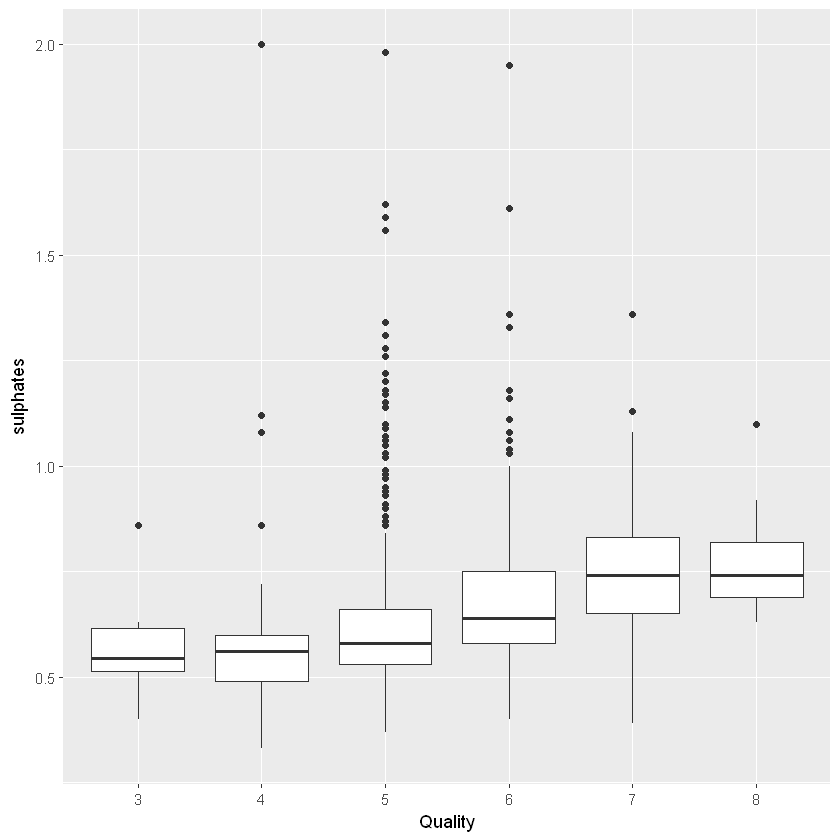

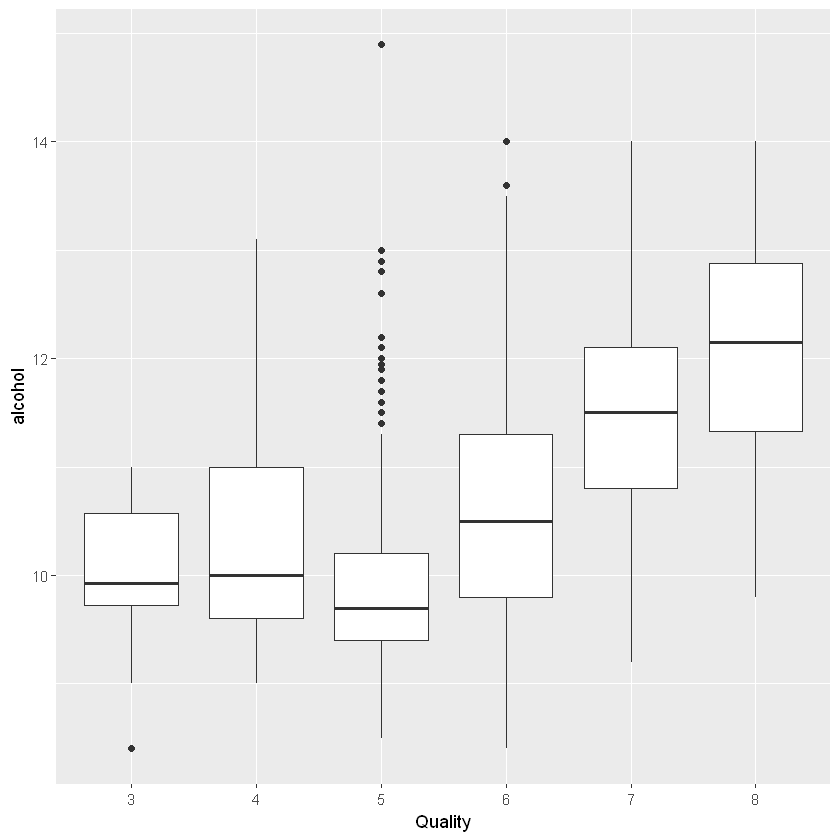

In [144]:
g <- list()
col_names <- colnames(winequality[,1:11])
for(names in col_names){
    g[[names]] <- ggplot(winequality[c(names,'quality')], aes(as.factor(quality),winequality[[names]])) +
                geom_boxplot() + ylab(names) + xlab('Quality') 
    print(g[[names]])
}

* Most of the high values are in wine quality '5' and '6' and we can't say those are outliers.
* Mean of **alcohol**, **sulphates**, **volatile acidity**, **total sulpher dioxide** and **density** looks significantly different from each other for wine quality '5' and '6' and hence they could be significant variable to determine quality

In [145]:
# finding correlation
wine_corr <- data.frame(cor(winequality))
print(cbind(colnames(winequality),round(wine_corr$quality, 3)))

      [,1]                   [,2]    
 [1,] "fixed.acidity"        "0.124" 
 [2,] "volatile.acidity"     "-0.391"
 [3,] "citric.acid"          "0.226" 
 [4,] "residual.sugar"       "0.014" 
 [5,] "chlorides"            "-0.129"
 [6,] "free.sulfur.dioxide"  "-0.051"
 [7,] "total.sulfur.dioxide" "-0.185"
 [8,] "density"              "-0.175"
 [9,] "pH"                   "-0.058"
[10,] "sulphates"            "0.251" 
[11,] "alcohol"              "0.476" 
[12,] "quality"              "1"     


No variable is highly correlated with quality variable

### Regression

In [146]:
# splitting data in training and test dataset
set.seed(80)
data_split <- sample.split(winequality$quality, SplitRatio = 0.8)
quality_Train <- subset(winequality, data_split == TRUE)
quality_Test <- subset(winequality, data_split == FALSE)

winequality_dist <- data.frame(table(winequality$quality))
train_dist <- data.frame(table(quality_Train$quality))
test_dist <- data.frame(table(quality_Test$quality))
class_dist <- cbind(winequality_dist, train_dist[2], test_dist[2])
class_dist

Var1,Freq,Freq,Freq
3,10,8,2
4,53,42,11
5,681,545,136
6,638,510,128
7,199,159,40
8,18,14,4


#### Linear regression

In [148]:
# simple linear regression with all variables
quality_lm <- lm(quality ~ ., data=quality_Train)
summary(quality_lm)


Call:
lm(formula = quality ~ ., data = quality_Train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62550 -0.38004 -0.05291  0.45925  2.02397 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          13.9361129 23.6487515   0.589  0.55577    
fixed.acidity         0.0041328  0.0297963   0.139  0.88971    
volatile.acidity     -1.0403501  0.1350077  -7.706 2.61e-14 ***
citric.acid          -0.1268170  0.1634801  -0.776  0.43805    
residual.sugar        0.0185796  0.0162361   1.144  0.25270    
chlorides            -2.0359122  0.4717336  -4.316 1.71e-05 ***
free.sulfur.dioxide   0.0040804  0.0024357   1.675  0.09413 .  
total.sulfur.dioxide -0.0033711  0.0007994  -4.217 2.65e-05 ***
density              -9.2389435 24.1555338  -0.382  0.70217    
pH                   -0.5658103  0.2150602  -2.631  0.00862 ** 
sulphates             0.8847018  0.1293447   6.840 1.23e-11 ***
alcohol               0.2851374  0.0292505   9.748  < 2e-1

* linear regression confrms that **alcohol**, **sulphates**, **volatile acidity**, and **total sulpher dioxide** are significant variables.

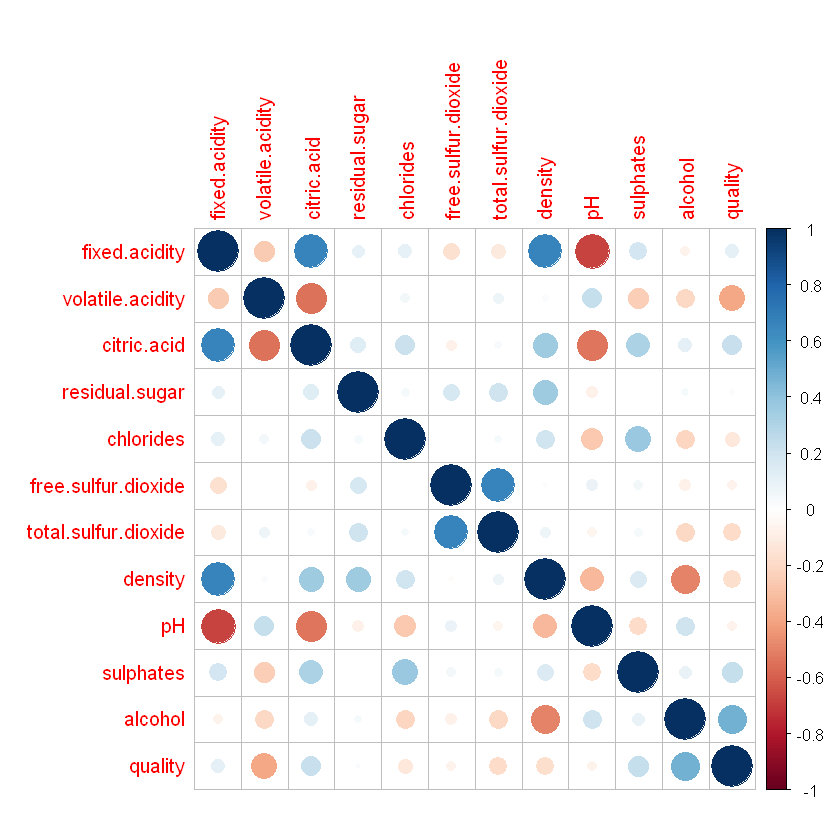

In [149]:
# checking for correlation among significant variables
corrplot(cor(quality_Train))

* acidic variables are correlated with each other and with ph and density. So i just selected one acidic variable(volatile.acidity) in model

#### Generalized linear regression

In [150]:
# generalized linear regression
quality_glm <- glm(quality ~ alcohol + sulphates + total.sulfur.dioxide + chlorides + volatile.acidity + pH,
                  data = quality_Train, family = gaussian(link='log'))
summary(quality_glm)


Call:
glm(formula = quality ~ alcohol + sulphates + total.sulfur.dioxide + 
    chlorides + volatile.acidity + pH, family = gaussian(link = "log"), 
    data = quality_Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.57143  -0.36908  -0.06623   0.46119   1.99153  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.5179035  0.0786172  19.308  < 2e-16 ***
alcohol               0.0502667  0.0031625  15.895  < 2e-16 ***
sulphates             0.1492836  0.0208920   7.145 1.51e-12 ***
total.sulfur.dioxide -0.0004580  0.0001007  -4.550 5.89e-06 ***
chlorides            -0.3698605  0.0826713  -4.474 8.37e-06 ***
volatile.acidity     -0.1792782  0.0203603  -8.805  < 2e-16 ***
pH                   -0.0804087  0.0229158  -3.509 0.000466 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.4216946)

    Null deviance: 830.08  on 1277  deg

In [151]:
quality_Train$quality <- as.factor(quality_Train$quality)
quality_Test$quality <- as.factor(quality_Test$quality)

#### Multinomial regression

In [154]:
# multinomial regression
quality_mult <- multinom(quality ~ alcohol + sulphates + total.sulfur.dioxide + chlorides + volatile.acidity + pH,
                        data = quality_Train)
summary(quality_mult)

# weights:  48 (35 variable)
initial  value 2289.868602 
iter  10 value 1521.061660
iter  20 value 1218.114049
iter  30 value 1200.566810
iter  40 value 1198.602969
iter  50 value 1196.495124
iter  60 value 1196.348861
iter  70 value 1196.343735
iter  80 value 1196.340968
final  value 1196.340937 
converged


Call:
multinom(formula = quality ~ alcohol + sulphates + total.sulfur.dioxide + 
    chlorides + volatile.acidity + pH, data = quality_Train)

Coefficients:
  (Intercept)  alcohol sulphates total.sulfur.dioxide  chlorides
4  -10.033247 1.414683  2.459335          0.016946841  -8.538268
5    4.466762 1.091010  1.978430          0.031372297 -11.788609
6   -1.816932 1.898954  4.058051          0.019305801 -15.069775
7   -7.796365 2.648409  6.567943          0.011755453 -21.349195
8   -4.698651 3.230186  8.516359          0.005819454 -49.353596
  volatile.acidity         pH
4        -3.831660 -0.1475751
5        -6.563636 -2.2542007
6        -8.727388 -2.6633364
7       -10.969574 -3.7075804
8        -9.950934 -7.3846670

Std. Errors:
  (Intercept)   alcohol sulphates total.sulfur.dioxide chlorides
4    3.400193 0.8181153  2.069120           0.02011798  2.986980
5    2.011930 0.7997983  1.793649           0.01939234  1.782556
6    1.852578 0.8011730  1.783610           0.01945042  1.809380

In [155]:
# calculating z value
z <- summary(quality_mult)$coefficients/summary(quality_mult)$standard.errors
print(z)

  (Intercept)  alcohol sulphates total.sulfur.dioxide  chlorides
4  -2.9507876 1.729197  1.188590            0.8423729  -2.858495
5   2.2201384 1.364107  1.103020            1.6177671  -6.613319
6  -0.9807591 2.370217  2.275189            0.9925649  -8.328694
7  -3.3916182 3.285540  3.607701            0.5948009  -6.930980
8  -0.9865611 3.777372  3.961708            0.2637345 -46.166728
  volatile.acidity          pH
4        -1.935006 -0.06557139
5        -3.400227 -1.09549984
6        -4.462283 -1.29593337
7        -5.333536 -1.76311680
8        -3.417253 -2.83038802


In [156]:
# calculating p value
p <- (1 - pnorm(abs(z), 0, 1))*2
print(p)

   (Intercept)      alcohol    sulphates total.sulfur.dioxide    chlorides
4 0.0031696484 0.0837737916 2.346011e-01            0.3995793 4.256556e-03
5 0.0264093774 0.1725340164 2.700185e-01            0.1057128 3.757972e-11
6 0.3267115616 0.0177776308 2.289457e-02            0.3209220 0.000000e+00
7 0.0006948119 0.0010178717 3.089224e-04            0.5519766 4.179324e-12
8 0.3238578683 0.0001584921 7.441561e-05            0.7919845 0.000000e+00
  volatile.acidity          pH
4     5.298952e-02 0.947719065
5     6.732993e-04 0.273297715
6     8.109107e-06 0.194998440
7     9.631828e-08 0.077880793
8     6.325649e-04 0.004649158


In [157]:
# constructing confusin matrix
prediction_mult <- predict(quality_mult, newdata = quality_Test, type = 'class')
confusionMatrix(prediction_mult, quality_Test[["quality"]])

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   1   0   0   0
         5   2   8 104  41   2   0
         6   0   3  30  83  23   2
         7   0   0   1   4  15   2
         8   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.6293          
                 95% CI : (0.5739, 0.6823)
    No Information Rate : 0.4237          
    P-Value [Acc > NIR] : 1.005e-13       
                                          
                  Kappa : 0.3913          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000 0.000000   0.7647   0.6484  0.37500  0.00000
Specificity          1.000000 0.996774   0.7135   0.6995  0.97509  1.00000
Pos Pred Value            NaN 0.000000   0.6624   0.5887  0.68182      NaN
Neg Pred Value 

* we able to achieve 63% accuracy with above multinom model.

Now we convert quality variable into good and bad wine based on current quality ratings
    * quality >= 6 is good wine
    * quality < 6 is bad wine

In [158]:
winequality$good.wine <- ifelse(winequality$quality > 6,1,0)

In [159]:
head(winequality)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,good.wine
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0


In [160]:
winequality$good.wine <- as.factor(winequality$good.wine)
str(winequality)

'data.frame':	1599 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ good.wine           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 2 1 ...


In [161]:
# splitting data into training and test dataset
set.seed(80)
data_split <- sample.split(winequality$good.wine, SplitRatio = 0.8)
quality_Train <- subset(winequality, data_split == TRUE)
quality_Test <- subset(winequality, data_split == FALSE)

In [162]:
head(quality_Train)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,good.wine
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,0


#### Binomial glm

In [163]:
quality_bi_glm <- glm(good.wine ~ alcohol + sulphates + total.sulfur.dioxide + chlorides + volatile.acidity + pH,
                      data = quality_Train, family=binomial(link='logit'))
summary(quality_bi_glm)


Call:
glm(formula = good.wine ~ alcohol + sulphates + total.sulfur.dioxide + 
    chlorides + volatile.acidity + pH, family = binomial(link = "logit"), 
    data = quality_Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5388  -0.4447  -0.2459  -0.1441   2.8974  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -7.105718   2.300912  -3.088  0.00201 ** 
alcohol               1.015524   0.095941  10.585  < 2e-16 ***
sulphates             3.172385   0.591410   5.364 8.14e-08 ***
total.sulfur.dioxide -0.010325   0.003644  -2.834  0.00460 ** 
chlorides            -7.030800   3.086056  -2.278  0.02271 *  
volatile.acidity     -2.736650   0.690987  -3.960 7.48e-05 ***
pH                   -1.716470   0.682247  -2.516  0.01187 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1017.65  on 1279  degrees of freedom
Resid

In [164]:
# constructing confusin matrix
prediction_bi_mult <- predict.glm(quality_bi_glm, newdata = quality_Test, type = 'response')

In [165]:
predicted_values <- ifelse(prediction_bi_mult > 0.5,1,0)

In [166]:
confusionMatrix(predicted_values, quality_Test$good.wine)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 266  27
         1  10  16
                                         
               Accuracy : 0.884          
                 95% CI : (0.8437, 0.917)
    No Information Rate : 0.8652         
    P-Value [Acc > NIR] : 0.184520       
                                         
                  Kappa : 0.4031         
 Mcnemar's Test P-Value : 0.008529       
                                         
            Sensitivity : 0.9638         
            Specificity : 0.3721         
         Pos Pred Value : 0.9078         
         Neg Pred Value : 0.6154         
             Prevalence : 0.8652         
         Detection Rate : 0.8339         
   Detection Prevalence : 0.9185         
      Balanced Accuracy : 0.6679         
                                         
       'Positive' Class : 0              
                                         

* predicton accuracy increased to 88%

In [168]:
getwd()

[1] "C:/Users/Ajinkya"